# 과제1. k-NN 알고리즘 score 확인

#### (1) k-NN알고리즘의 neighbor개수에 따른 score값 변화 확인
- 1장에서 n_neighbors의 값을 49로 설정하였을 때 score()의 결과가 1보다 작았음 (정확도가 100%가 아님)
- n_neighbors의 값을 5부터 49까지 바꾸어 가면서 score() 함수의 결과 및 n_neghbors의 값을 plot 차트로 표현하시오.

In [42]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 
                30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 
                33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 
                36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

In [43]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 
                12.2, 12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 
                13.4, 12.2, 19.7, 19.9]

In [44]:
# 도미 데이터와 빙어 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [45]:
# 사이킷런이 기대하는 데이터 형태
fish_data = [[l, w] for l, w in zip(length, weight)]
# print(fish_data)

In [46]:
# 정답 데이터(fish_target) 준비
# 생선의 길이와 무게를 이용하여 도미(1)와 빙어(0)를 구분
fish_target = [1] * 35 + [0] * 14
# print(fish_target)

n_neighbors=5 => 1.0
n_neighbors=6 => 1.0
n_neighbors=7 => 1.0
n_neighbors=8 => 1.0
n_neighbors=9 => 1.0
n_neighbors=10 => 1.0
n_neighbors=11 => 1.0
n_neighbors=12 => 1.0
n_neighbors=13 => 1.0
n_neighbors=14 => 1.0
n_neighbors=15 => 1.0
n_neighbors=16 => 1.0
n_neighbors=17 => 1.0
n_neighbors=18 => 0.9795918367346939
n_neighbors=19 => 0.9795918367346939
n_neighbors=20 => 0.9795918367346939
n_neighbors=21 => 0.9795918367346939
n_neighbors=22 => 0.9795918367346939
n_neighbors=23 => 0.9795918367346939
n_neighbors=24 => 0.9795918367346939
n_neighbors=25 => 0.9795918367346939
n_neighbors=26 => 0.9795918367346939
n_neighbors=27 => 0.9795918367346939
n_neighbors=28 => 0.9591836734693877
n_neighbors=29 => 0.7142857142857143
n_neighbors=30 => 0.7142857142857143
n_neighbors=31 => 0.7142857142857143
n_neighbors=32 => 0.7142857142857143
n_neighbors=33 => 0.7142857142857143
n_neighbors=34 => 0.7142857142857143
n_neighbors=35 => 0.7142857142857143
n_neighbors=36 => 0.7142857142857143
n_neighbors=37 =

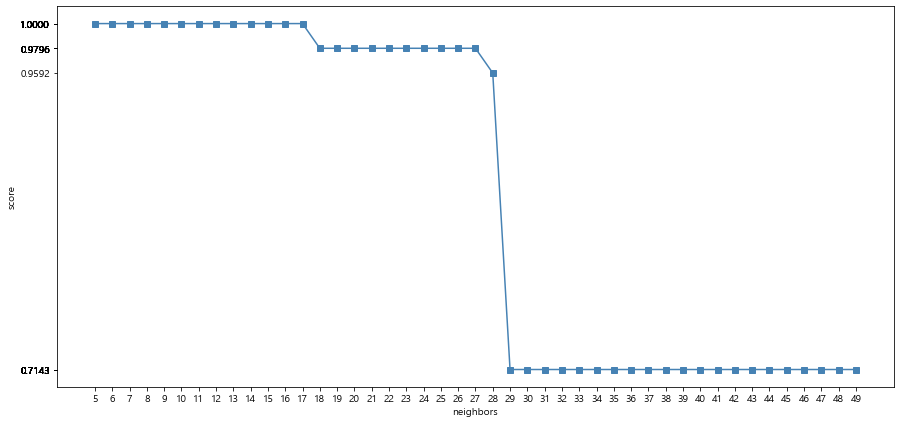

In [47]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':  # MacOS
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='AppleGothic')

neighbors = list()
score = list()    
for n in range(5, 50):
    kn = KNeighborsClassifier(n)  # KNN 모델 생성
    kn.fit(fish_data, fish_target)  # 모델 훈련(학습): fit() 함수
    score.append(kn.score(fish_data, fish_target))  # 모델 평가: score() 함수
    print(f'n_neighbors={n} => {kn.score(fish_data, fish_target)}')
    neighbors.append(n)

plt.figure(figsize = (15, 7))
plt.plot(neighbors, score, marker='s', color='steelblue')
plt.xticks(neighbors)
plt.yticks(score)
plt.xlabel('neighbors')
plt.ylabel('score')

plt.show()

#### (2) plot()에 사용한 n_neighbors와 score값을 이용하여, n_neighbors의 개수에 대한 score값을 numpy의 column_stack() 함수를 이용하여 ndarray 타입으로 변환한 다음, 아래와 같이 pandas의 DataFrame으로 변환하여 출력하시오.

In [48]:
import numpy as np

data = np.column_stack((neighbors, score))
# type(data)

In [49]:
import pandas as pd

DF = pd.DataFrame(data)
DF.columns = ['neighbors', 'score']
DF

,neighbors,score
0,5.0,1.000000
1,6.0,1.000000
2,7.0,1.000000
3,8.0,1.000000
4,9.0,1.000000
5,10.0,1.000000
6,11.0,1.000000
7,12.0,1.000000
8,13.0,1.000000
9,14.0,1.000000
